In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
bike_rack = gpd.read_file('../data/Bike Racks (GIS).geojson')
print(bike_rack.crs)
bike_rack.head( )


EPSG:4326


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [3]:
metro_parks = gpd.read_file('../data/Metro Parks Boundaries (GIS).geojson')
print(metro_parks.crs)
metro_parks.head( )


EPSG:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [4]:
type(metro_parks)

geopandas.geodataframe.GeoDataFrame

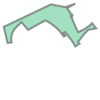

In [5]:
metro_parks.loc[0, 'geometry']

In [6]:
type(bike_rack)

geopandas.geodataframe.GeoDataFrame

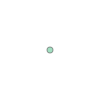

In [7]:
bike_rack.loc[0,'geometry']

In [8]:
print(metro_parks.loc[0, 'geometry']) #to see all of the zipcodes

MULTIPOLYGON (((-86.9554652476398 36.079301455798536, -86.95577768867267 36.079139093437696, -86.95554165522448 36.07881679726515, -86.95555002481612 36.078763362963265, -86.95547131924887 36.078720729617956, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.078391071735794, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.078294075262384, -86.95521421491281 36.078266384907266, -86.9552084636451 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.078153868812706, -86.95519898519579 36.078125575091285, -86.95519999833 36.07809727154806, -86.95520236476608 36.078068956381045, -86.9552057503346 36.078040908937375, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.078130121682676, -86.95500338104712 36.0780332215624

In [9]:
print(bike_rack.loc[0, 'geometry'])

POINT (-86.65545277788499 36.049927777764)


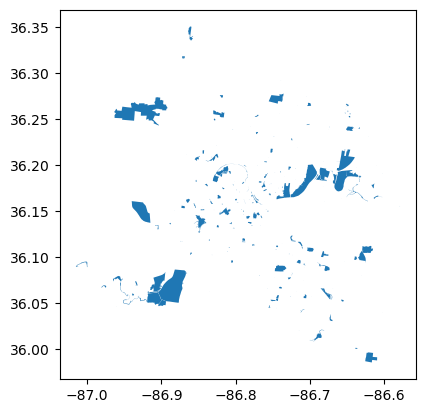

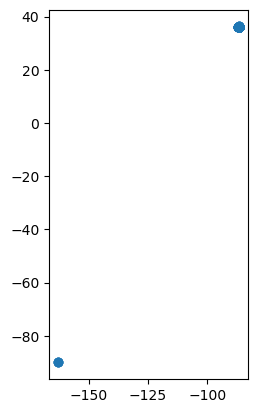

In [10]:
metro_parks.plot();

#bike_rack
bike_rack.plot();

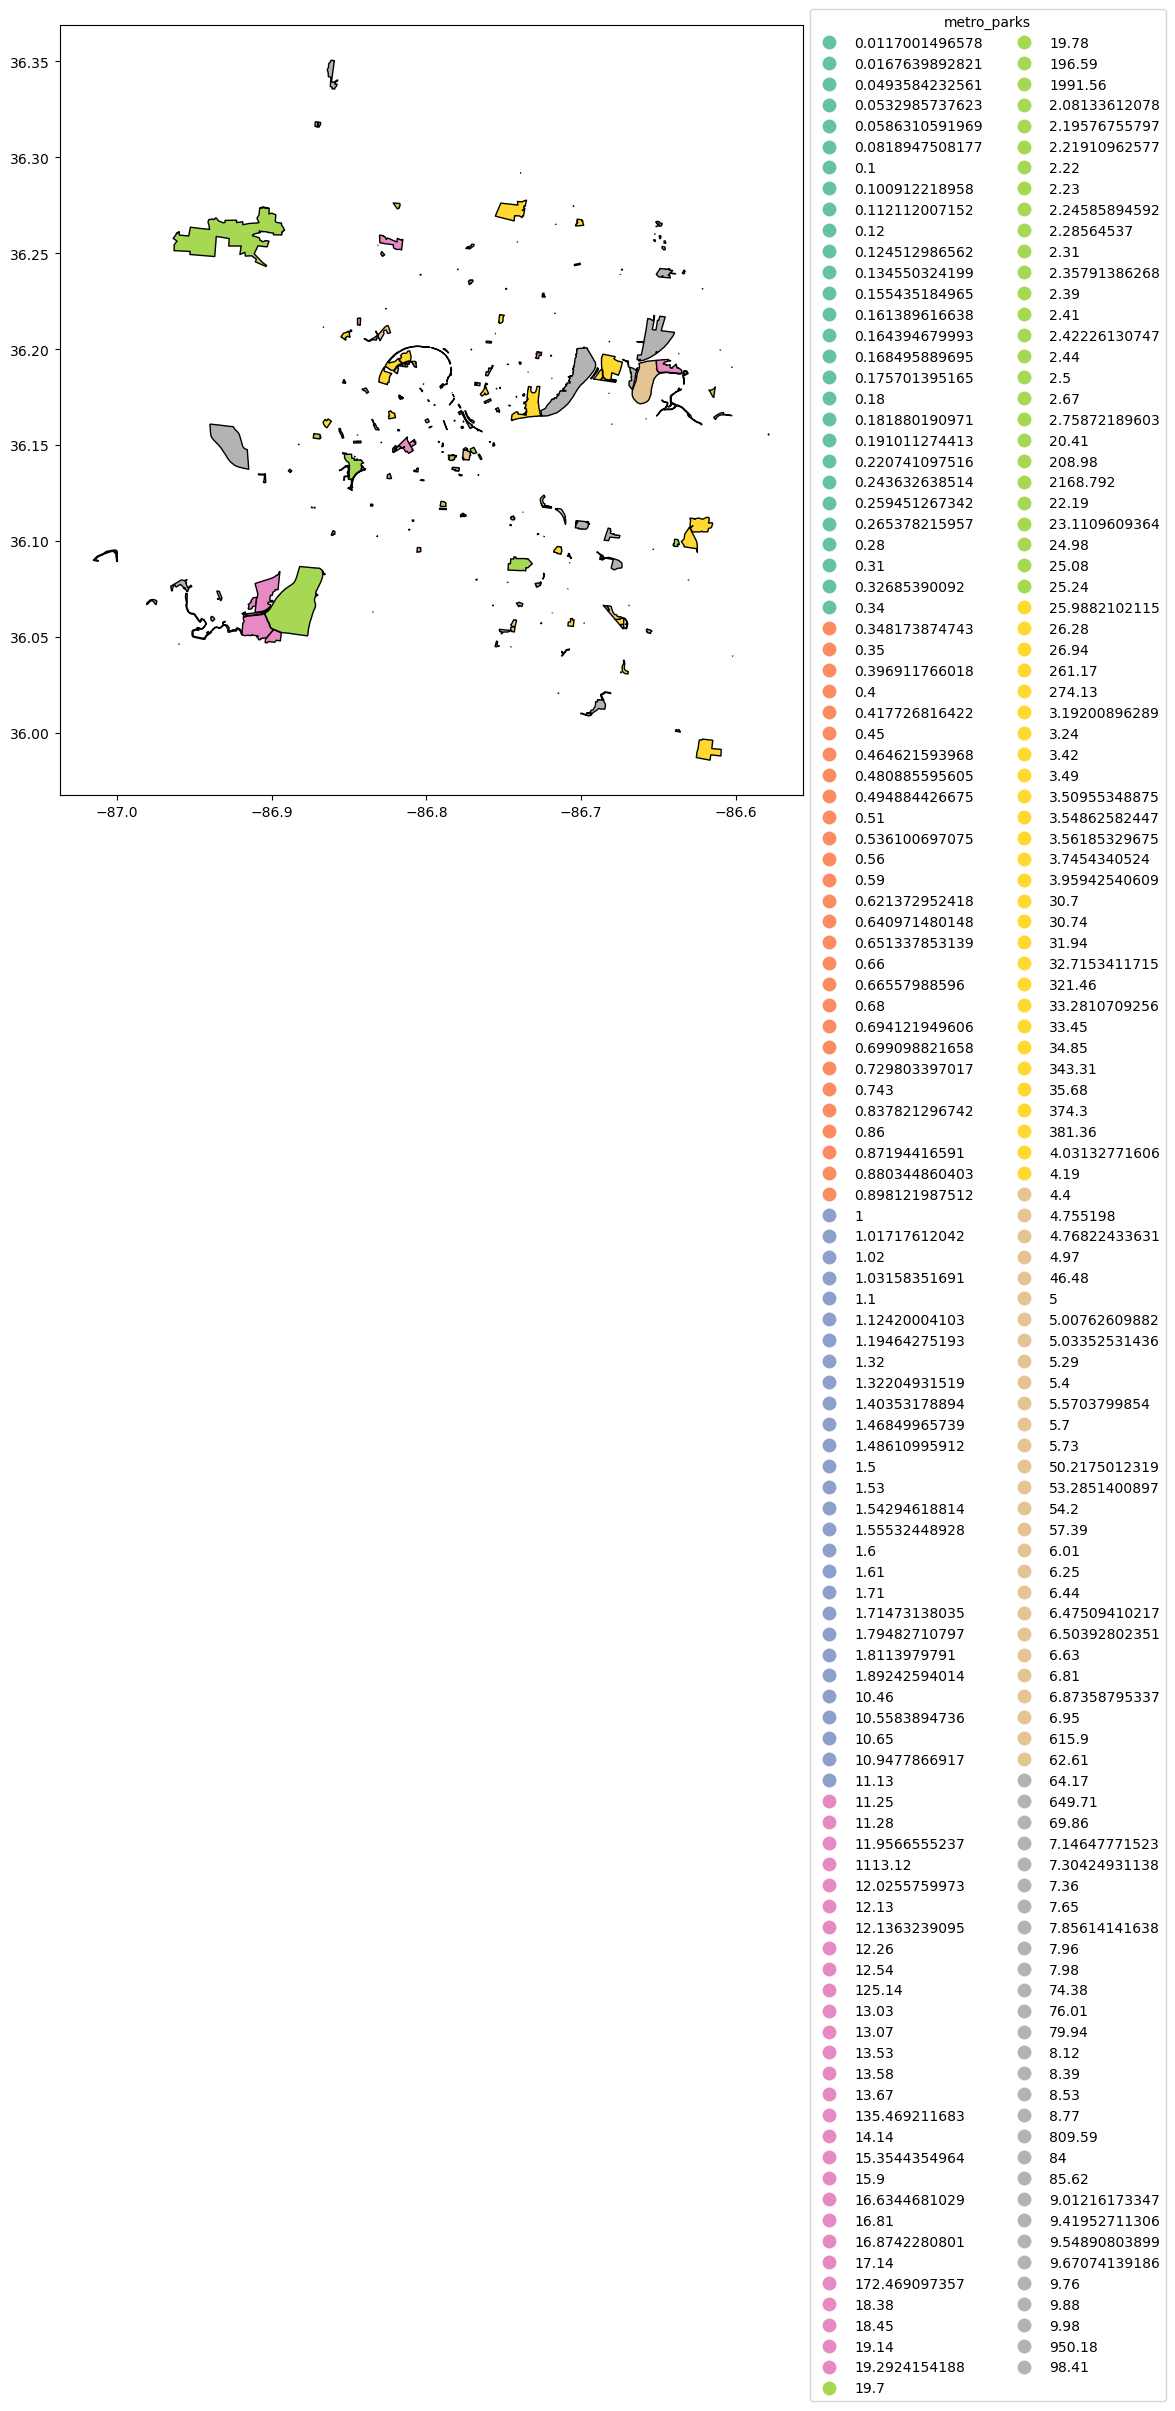

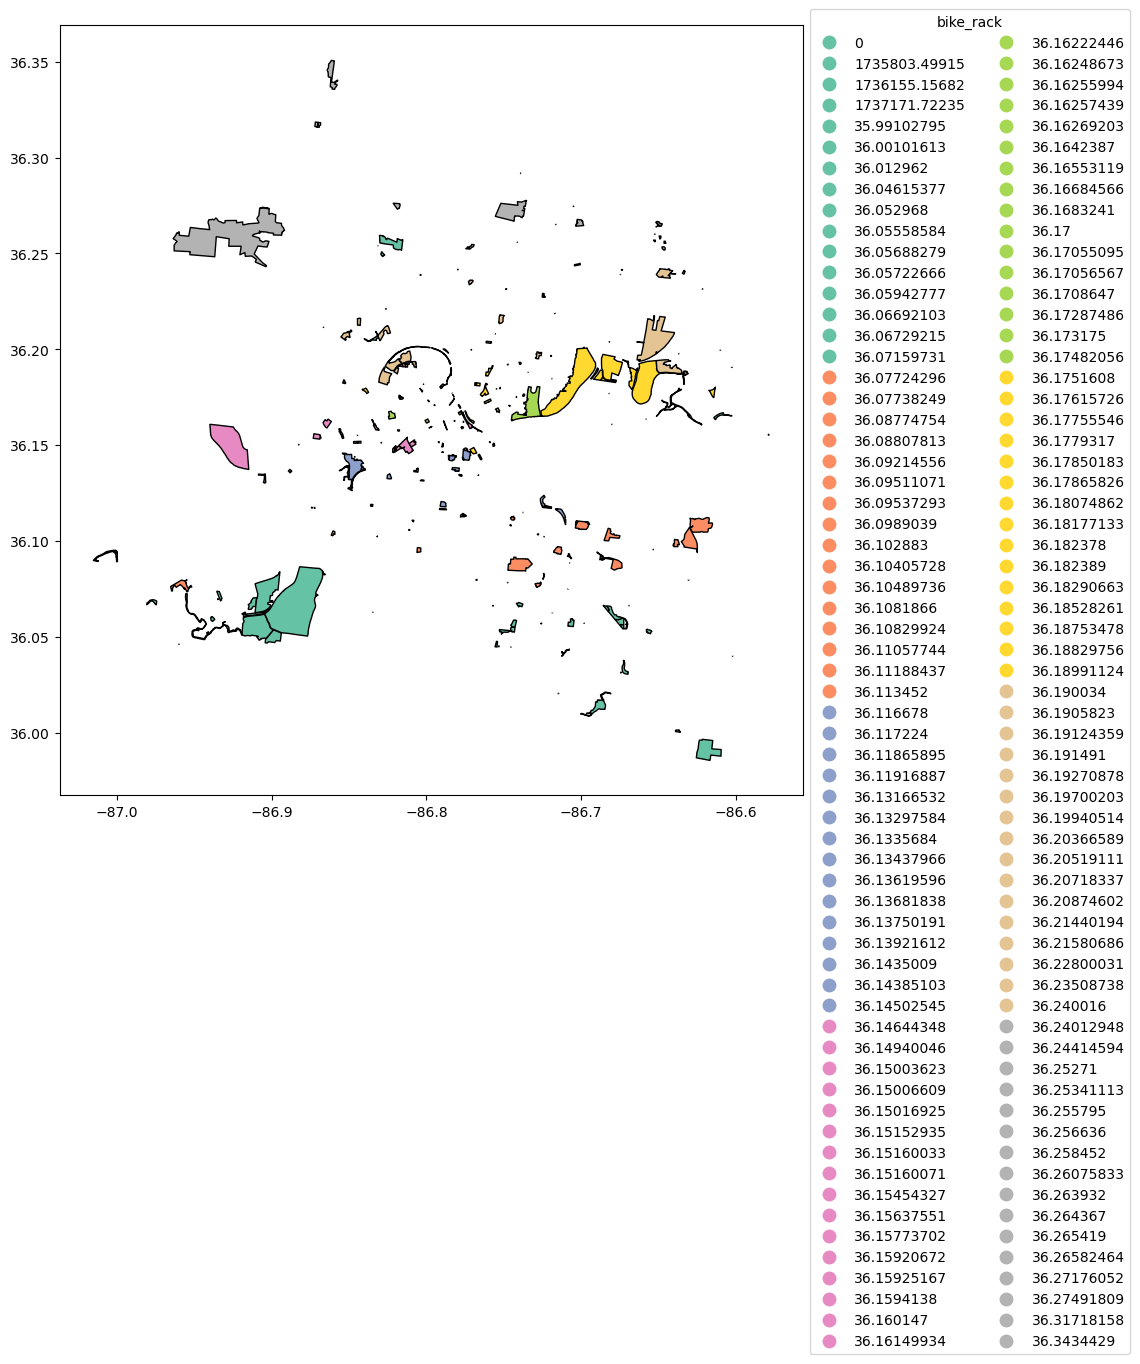

In [11]:
leg_kwds = {'title': 'metro_parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

metro_parks.plot(column = 'acres', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#bike_rack

leg_kwds = {'title': 'bike_rack', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

metro_parks.plot(column = 'lat', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()




In [12]:
metro_parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   acres       287 non-null    object  
 1   name        183 non-null    object  
 2   year_estab  287 non-null    object  
 3   common_nam  287 non-null    object  
 4   status      287 non-null    object  
 5   address     283 non-null    object  
 6   lon         287 non-null    object  
 7   lat         287 non-null    object  
 8   descriptio  103 non-null    object  
 9   geometry    287 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 22.5+ KB


In [13]:
bike_rack.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
metro_parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
bike_rack.info

<bound method DataFrame.info of                                             detail_loc quantity  \
0                                  Hickory Hollow Mall        1   
1      Stones River Greenway - Donelson/Hermitage Area        2   
2        Percy Priest Reservoir, Stones River Greenway        0   
3    Two Rivers Golf Course, Stones River Greenway ...        1   
4                         East Park & Community Center        3   
..                                                 ...      ...   
425           NE Corner of Demonbruen St and Music Row        1   
426                                        Morgan Park        1   
427                                    2318 12th Ave S        1   
428            East end of Shelby St Pedestrian Bridge        1   
429                                    Glenview School        1   

                  location  domain idnumber objectid    status  \
0                     Mall  Public      113        1  Existing   
1                 Greenway  Pub

In [16]:
bikegeo = gpd.GeoDataFrame(bike_rack, 
                           crs = metro_parks.crs, 
                           geometry = gpd.points_from_xy(bike_rack.lon, bike_rack.lat))

In [17]:
type(bikegeo)

geopandas.geodataframe.GeoDataFrame

In [18]:
metro_parks = metro_parks[[ 'name', 'year_estab','geometry']] #use the double bracket to drop the column instead of the .drop, they do the same thing

In [19]:
capacity_bike_park = gpd.sjoin(bikegeo, metro_parks, predicate = 'within')

In [20]:
capacity_bike_park.head()

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry,index_right,name,year_estab
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528),270,None,2003
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755),91,Two Rivers Park,1966
409,Wave Country,0,Park,Public,431,410,Future Artistic,-86.6875304194,Rack,Civic,36.1872651777,0,POINT (-86.68753 36.18727),91,Two Rivers Park,1966
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246),70,East Park,1916
393,East Park - Woodland St @ S 8th St,0,Park,Public,415,394,Future Artistic,-86.7587196799,Rack,Civic,36.1740162738,0,POINT (-86.75872 36.17402),70,East Park,1916


In [21]:
capacity_bike_park['capacity'].value_counts()

capacity
0     69
5     19
2      9
4      8
10     6
8      4
6      3
16     2
15     1
1      1
3      1
18     1
Name: count, dtype: int64

In [32]:
#filter the capacity by detail location
capacity_by_location_103 = capacity_bike_park.loc[capacity_bike_park['idnumber'] == '103']
capacity_by_location_103.shape



(1, 16)

In [25]:
polygon103 = capacity_bike_park.loc[capacity_bike_park['idnumber'] == '103']
polygon103.shape


(1, 16)

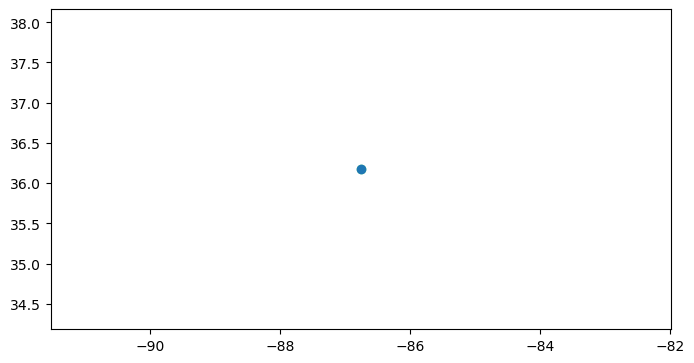

In [29]:
#fig, ax = matplotlib.subplots()
ax = polygon103.plot(figsize = (8, 10), color = 'lightgreen')
capacity_by_location_103.plot( ax = ax, column = 'idnumber');
plt.show();

In [33]:
polygon103.geometry.centroid

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_10380/2273125972.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon103.geometry.centroid


4    POINT (-86.76218 36.17246)
dtype: geometry

In [35]:
#find the center of the larger (more southern) polygon and look at it
center = polygon103.geometry.centroid[4]
print(center)

POINT (-86.7621800831 36.1724554062)


/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_10380/1233700194.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon103.geometry.centroid[4]


In [36]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x] #the square bracket is displaying an array

# check the order of area_center, the location for our folium map
print(area_center)

[36.1724554062, -86.7621800831]


In [37]:
#create our map of location idnumber and show it
map_103 = folium.Map(location =  area_center, zoom_start = 12)
map_103

In [38]:
i = 0
for row_index, row_values in capacity_by_location_103.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 4
values are:
 
detail_loc             East Park & Community Center
quantity                                          3
location                      Park/Community Center
domain                                       Public
idnumber                                        103
objectid                                          5
status                                     Existing
lon                                  -86.7621800831
type                                           Rack
data_colle                              Health Dept
lat                                   36.1724554062
capacity                                         15
geometry       POINT (-86.7621800831 36.1724554062)
index_right                                      70
name                                      East Park
year_estab                                     1916
Name: 4, dtype: object
------------------------- 


In [41]:
#draw our zip code area: 103
map_103 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon103).add_to(map_103)

#iterate through capacity_by_location_103 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in capacity_by_location_103.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['capacity'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_103)
map_103.save('../maps/map103.html')

#display our map
map_103

In [42]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [44]:
cluster_map_103 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_103)

folium.GeoJson(polygon103).add_to(cluster_map_103)

# inside the loop add each marker to the cluster
for row_index, row_values in capacity_by_location_103.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['capacity'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_103.save('../maps/cluster37207.html')

cluster_map_103  

In [47]:
#draw our capacity: 103
map_103 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon103).add_to(map_103)

#create a list of locations and pass them to FastMarkerCluster()
locations = capacity_by_location_103[['lat', 'lon']].values.tolist()
map_103.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_103